In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('_weights_heights.csv', index_col='Index')

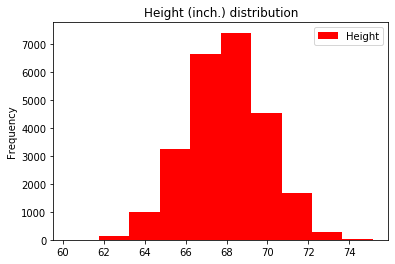

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [7]:
data


,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


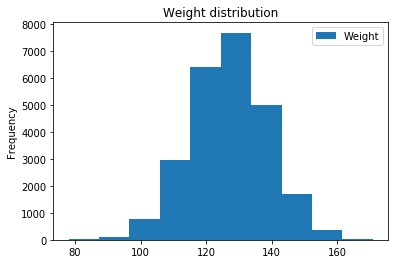

In [8]:
data.plot(y='Weight', kind='hist', title='Weight distribution')

In [9]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [10]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)
data.head(5)

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


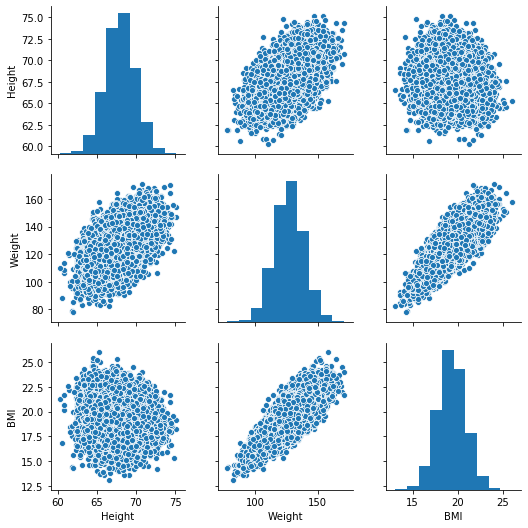

In [11]:
sns.pairplot(data)

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


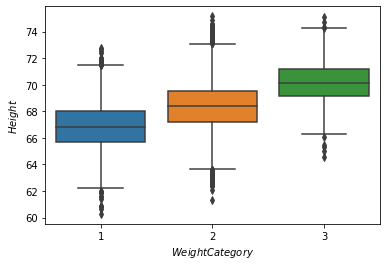

In [20]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=data)
plt.xlabel('$Weight Category$')
plt.ylabel('$Height$')
data.head(5)

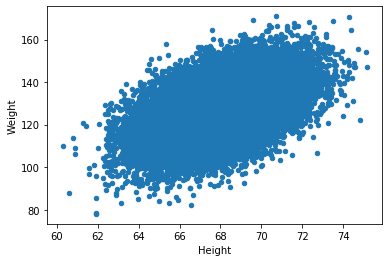

In [22]:
data.plot(x='Height',y='Weight',kind='scatter')

In [34]:
def quad_error(w0, w1):# Ваш код здесь
    sum = 0
    for i in range(1, data['Height'].count()+1):
        sum += (data['Height'][i] - (w0 + w1 * data['Weight'][i])) ** 2
    return sum

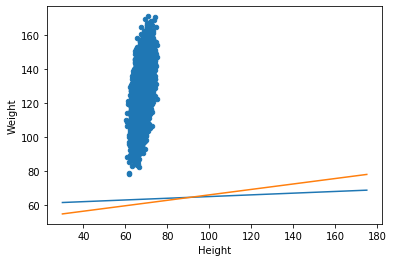

In [35]:
def lin_func(x, w0, w1):
    return w0 + w1*x
x = np.linspace(30, 175)
data.plot(x='Height', y='Weight', kind='scatter')
plt.plot(x, lin_func(x, 60, 0.05))
plt.plot(x, lin_func(x, 50, 0.16))

Text(0, 0.5, 'quadratic error')

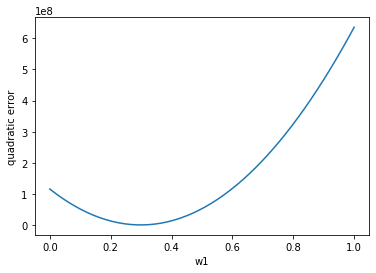

In [39]:
w1 = np.linspace(0, 1)# Ваш код здесь
plt.plot(w1, quad_error(w0, w1))
plt.xlabel('w1')
plt.ylabel('quadratic error')

In [50]:
from scipy.optimize import minimize_scalar as ms
def quad_error_w0_fixed(w1):
    return quad_error(50,w1)

w1_opt = ms(quad_error_w0_fixed, bounds=(-5,5), method='bounded').x #подается функция этому методу и он выдает оптимальные параметры функции


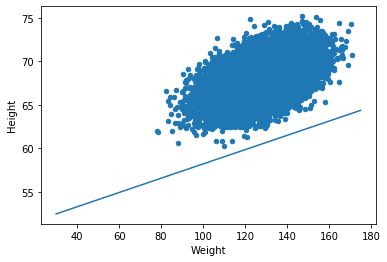

In [78]:
data.plot('Weight', 'Height', kind='scatter')
plt.plot(x, lin_func(x, 50,w1_opt))

In [60]:
from mpl_toolkits.mplot3d import Axes3D

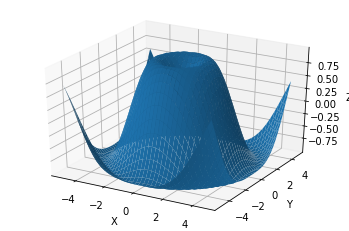

In [61]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

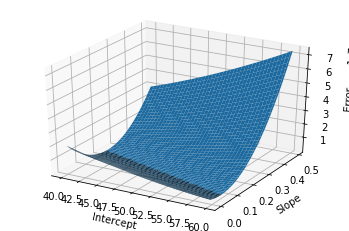

In [68]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(40, 60, 0.25)
Y = np.arange(0, 0.5, 0.01)
X, Y = np.meshgrid(X,Y)
z = quad_error(X,Y)
surf = ax.plot_surface(X, Y, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [75]:
from scipy.optimize import minimize
def quad_error_again(arr):
    return quad_error(arr[0], arr[1])
w0_opt, w1_opt = minimize(quad_error_again,(0,0), method='L-BFGS-B', bounds = ((-100,100), (-5,5))).x

57.571713228102944 0.08200701012452392


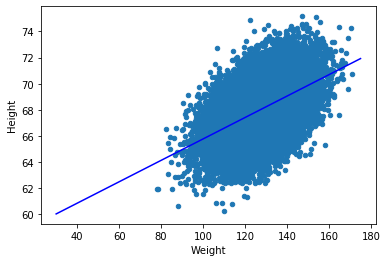

In [81]:
data.plot('Weight', 'Height', kind='scatter')
print(w0_opt, w1_opt)
plt.plot(x, lin_func(x, w0_opt, w1_opt), color='blue')